# Analise de resultados de MDC

In [56]:
import json
import pandas as pd
import matplotlib.pyplot as plt


In [57]:
  
# Opening JSON file
f = open('../test/GCD_results.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

df = pd.DataFrame(data)

In [58]:

df["log(B)base10"] = df.apply(lambda row: len(row.b) , axis=1)
df

,a,b,gasWhenCalculateOnChain,initialGasCalculate,executionGasCalculate,gasWhenValidateOnChain,initialGasValidate,executionGasValidate,RatioCalculateVsValidate,log(B)base10
0,139338489218383486488462816,970222616591789508841856,5628,855,4773,2087,1870,217,2.696694,24
1,120004651795119,3,988,687,301,1415,1198,217,0.698233,1
2,1582587771873711,144414638792304,3296,759,2537,1931,1714,217,1.706888,15
3,14828719019206,82,1418,687,731,1799,1582,217,0.788216,2
4,1646896010502052956204,13713900287218,3320,783,2537,1955,1738,217,1.698210,14
...,...,...,...,...,...,...,...,...,...,...
995,6808141138391,97,1504,687,817,1799,1582,217,0.836020,2
996,115460153740425415631,1691574,1994,747,1247,1883,1666,217,1.058948,7
997,24512075567855837317438044330,10733383031463880025,3982,843,3139,2039,1822,217,1.952918,20
998,512406035255135919725096,174798741274642097020,4572,831,3741,2039,1822,217,2.242276,21


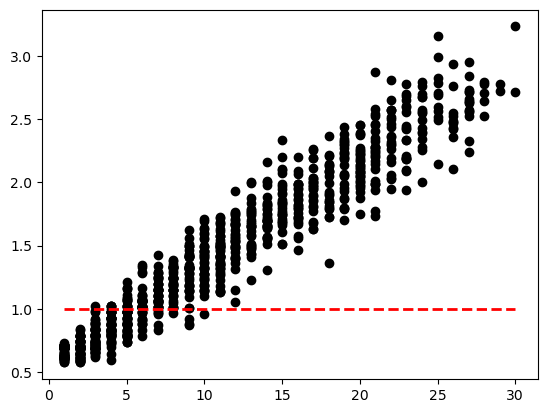

In [59]:
# Plot da razao de custo de vs a ordem de grandeza de B
plt.scatter(df['log(B)base10'], df['RatioCalculateVsValidate'],c='black')
plt.hlines(y=1, xmin=1, xmax=30, colors='red', linestyles='--', lw=2, label='Single Short Line')

plt.show()

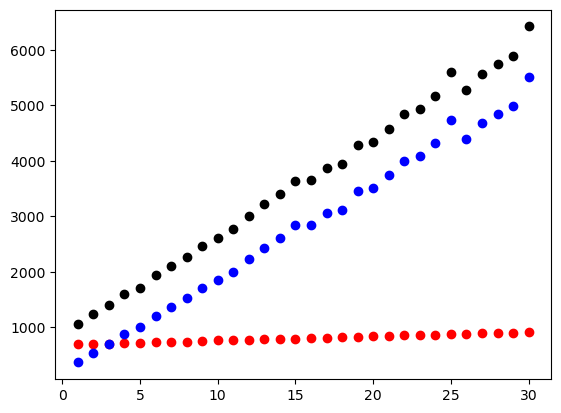

In [66]:
df_calculate = df[['gasWhenCalculateOnChain', 'initialGasCalculate', 'executionGasCalculate', 'log(B)base10']]
df_calculate_grouped = df_calculate.groupby(['log(B)base10']).mean()

plt.scatter(df_calculate_grouped.index.values, df_calculate_grouped['gasWhenCalculateOnChain'],c='black')
plt.scatter(df_calculate_grouped.index.values, df_calculate_grouped['initialGasCalculate'],c='red')
plt.scatter(df_calculate_grouped.index.values, df_calculate_grouped['executionGasCalculate'],c='blue')

plt.show()

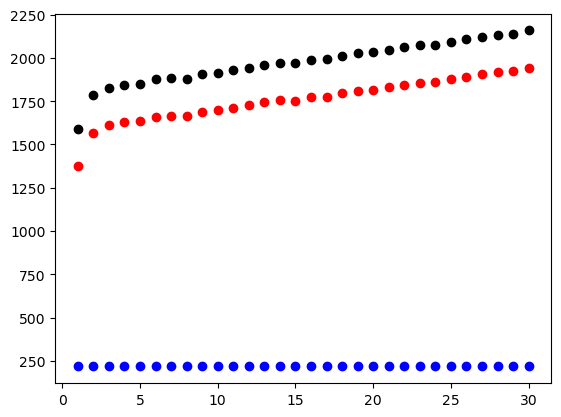

In [67]:
df_validate = df[['gasWhenValidateOnChain', 'initialGasValidate', 'executionGasValidate', 'log(B)base10']]
df_validate_grouped = df_validate.groupby(['log(B)base10']).mean()

plt.scatter(df_validate_grouped.index.values, df_validate_grouped['gasWhenValidateOnChain'],c='black')
plt.scatter(df_validate_grouped.index.values, df_validate_grouped['initialGasValidate'],c='red')
plt.scatter(df_validate_grouped.index.values, df_validate_grouped['executionGasValidate'],c='blue')

plt.show()

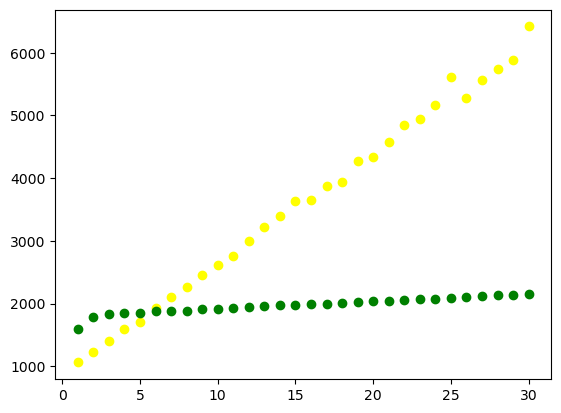

In [72]:
plt.scatter(df_validate_grouped.index.values, df_calculate_grouped['gasWhenCalculateOnChain'],c='yellow')
plt.scatter(df_validate_grouped.index.values, df_validate_grouped['gasWhenValidateOnChain'],c='green')

plt.show()

KeyError: 'gasWhenValidateOnChain'